In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import tools as tl
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


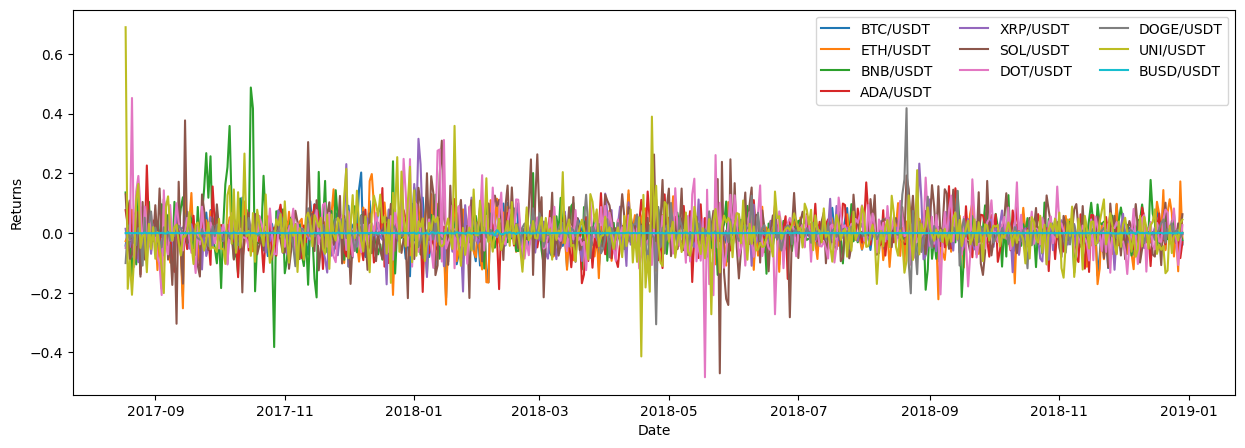

,BTC/USDT,ETH/USDT,BNB/USDT,ADA/USDT,XRP/USDT,SOL/USDT,DOT/USDT,DOGE/USDT,UNI/USDT,BUSD/USDT
Date,,,,,,,,,,
2017-08-18,-0.042113,-0.026983,0.136074,0.076931,0.014392,0.129833,-0.049597,-0.100517,0.689762,-0.000100
2017-08-19,0.007665,-0.010430,0.099795,0.030226,-0.042968,-0.006893,-0.017094,0.010714,-0.186784,0.000000
2017-08-20,-0.013053,0.027764,0.000553,0.108806,-0.047271,-0.089725,-0.023375,-0.022786,-0.091666,0.000100
2017-08-21,-0.017351,0.077772,-0.149713,-0.049009,-0.022348,-0.072005,0.452601,-0.001013,-0.206836,-0.000300
2017-08-22,0.005958,-0.042623,-0.034620,-0.017879,-0.014812,0.065710,-0.113183,-0.033078,-0.082571,0.000000
...,...,...,...,...,...,...,...,...,...,...
2018-12-25,-0.067662,-0.078571,0.065760,-0.013447,-0.013235,-0.015715,0.082494,-0.001087,-0.009407,-0.001101
2018-12-26,0.008493,0.013622,-0.024716,0.003026,-0.004438,-0.034087,-0.011238,0.007513,0.000000,-0.000902
2018-12-27,-0.057146,-0.128079,-0.001961,0.004823,0.004477,0.032419,-0.106904,0.011663,-0.024882,0.002103


In [104]:
coin_list = ['BTC/USDT', 'ETH/USDT', 'BNB/USDT', 'ADA/USDT', 'XRP/USDT', 'SOL/USDT', 'DOT/USDT', 'DOGE/USDT', 'UNI/USDT', 'BUSD/USDT']
time = '1d'
limit = 100
dfs = []
for coin in coin_list:
    dfs.append(tl.preprocess_df(coin,time=time,limit=limit))
stocks = pd.concat(dfs,axis = 1)
return_df = pd.DataFrame(np.diff(np.log(stocks['Close']).T).T)
return_df.index = dfs[0]['Date'].iloc[1:] # Set Date as index
return_df.columns = coin_list
plt.figure(figsize=(15,5))
x = plt.plot(return_df)
plt.ylabel('Returns')
plt.xlabel('Date')
plt.legend(iter(x), return_df.columns, ncol=3)
plt.show()
return_df

### Compounded Return

In [120]:
comp_return = tl.comp(return_df)
comp_return.sort_values()

ADA/USDT    -0.916815
XRP/USDT    -0.837281
ETH/USDT    -0.821720
DOGE/USDT   -0.529248
BTC/USDT    -0.522280
UNI/USDT    -0.369854
BUSD/USDT   -0.001068
DOT/USDT     1.013094
BNB/USDT     1.557711
SOL/USDT     7.696613
dtype: float64

Compounded returns refer to the growth rate of an investment over time, where the earnings from the investment are reinvested back into the investment.  
the compounded returns for ADA/USDT, XRP/USDT, ETH/USDT, DOGE/USDT, and BTC/USDT are all negative. This means that the value of these cryptocurrencies has decreased over the given period, resulting in negative returns for investors who held these assets during that time.  
the compounded returns for DOT/USDT, BNB/USDT, and SOL/USDT are all positive, indicating that the value of these cryptocurrencies has increased over the period. 

### Rolling Compounded Return

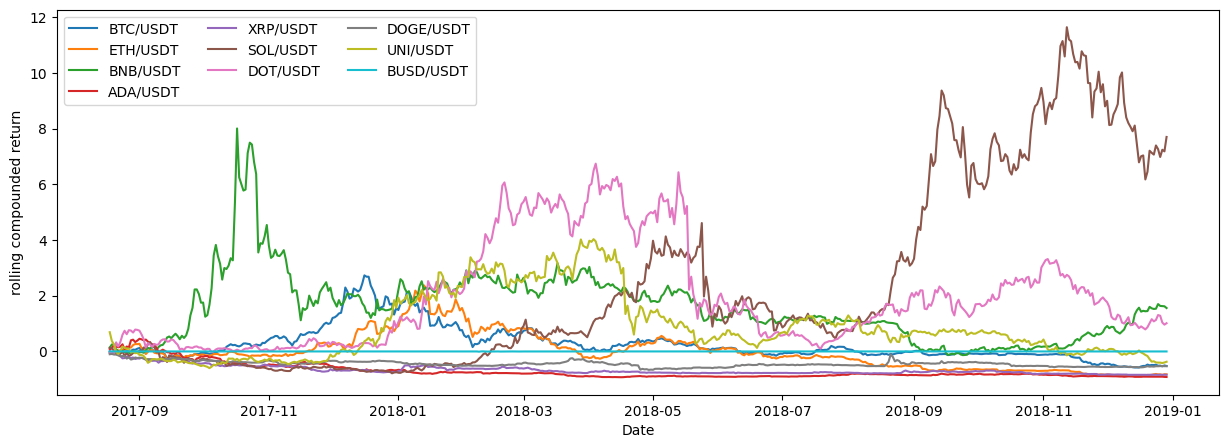

In [122]:
roll_comp_rets = tl.compsum(return_df)
plt.figure(figsize=(15,5))
x = plt.plot(roll_comp_rets)
plt.ylabel('rolling compounded return')
plt.xlabel('Date')
plt.legend(iter(x), roll_comp_rets.columns, ncol=3)
plt.show()

Rolling Compounded Returns is used to provide a more comprehensive view of investment performance over time, as it accounts for the volatility of returns and the impact of compounding. Here:

    BNB (Binance Coin), SOL (Solana), and DOT (Polkadot) appear to be the top performers, with high positive returns at several points during the period.

    BTC (Bitcoin), ETH (Ethereum), ADA (Cardano), XRP (Ripple), and DOGE (Dogecoin) seem to have more mixed performance, with periods of high positive returns followed by large negative returns.

    UNI (Uniswap) seems to have a relatively stable positive return throughout the period.

    BUSD (Binance USD) seems to have a stable value, with very small positive or negative returns.  

In [129]:
import ccxt
binance = ccxt.binance()
coin_ticker = binance.fetch_ohlcv('BTC/USDT', time, limit)
df = pd.DataFrame(coin_ticker, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume']) 
df['Date'] = pd.to_datetime(df['Date'], unit = 'ms' ) 


In [130]:
df

,Date,Open,High,Low,Close,Volume
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060
...,...,...,...,...,...,...
495,2018-12-25,4010.11,4020.00,3646.41,3745.79,62725.629432
496,2018-12-26,3745.56,3837.15,3656.74,3777.74,42629.375817
497,2018-12-27,3777.74,3813.98,3535.00,3567.91,44097.392912
498,2018-12-28,3567.89,3887.25,3540.04,3839.26,45964.304987
